In [112]:
from IPython.display import display, HTML

display(HTML('<style>.output_scroll { height: 400px; overflow-y: scroll; }</style>'))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore")

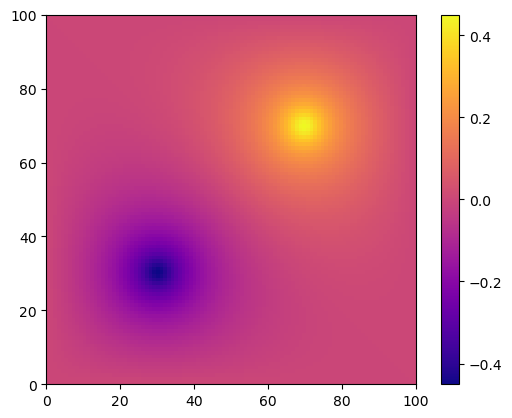

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.02): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE(Etol=10**-7,N=100,w=1.9):
    sfalma=1
    E=1 
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #αρχική τιμή ενέργειας
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    #S=np.zeros((N, N))
    X,Y=np.meshgrid(x,y)
    
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<5000:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] - h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum(pfilist*S)
       # E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2) + np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)

        #E2 = np.sum(S[:-1, :-1] * pfilist[:-1, :-1])
        
        Etmp=(1/(2*h))*E1-h*E2

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata=convE()
plt.imshow(diagdata[0].T,cmap='plasma', origin = 'lower', extent = [0, N, 0, N])
plt.colorbar()
plt.show()



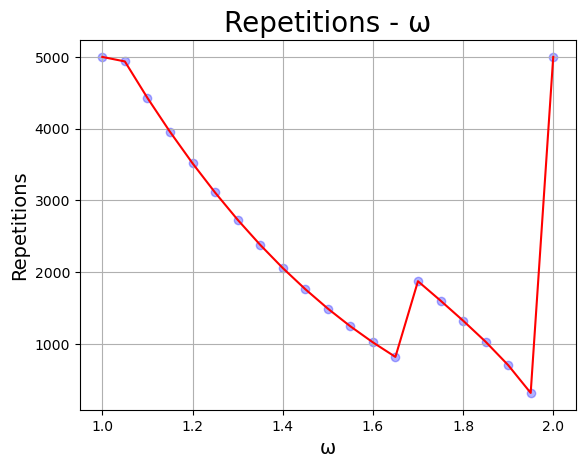

In [62]:
#now i wanna try different omegas and see convergence (iterations)

wlist=[]
iterlist=[]
energylist=[]
#af=apotelesma function


for w1 in np.arange(1.00, 2.05, 0.05):  # Δημιουργία τιμών από 1.0 έως 2.0
    af = convE(w=w1)  # Κλήση της συνάρτησης synartisi
    wlist.append(w1)  # Προσθήκη του omega στη λίστα
    iterlist.append(af[2])  # Προσθήκη του πρώτου αποτελέσματος
    energylist.append(af[1]) 




plt.plot(wlist,iterlist,color='red')
plt.scatter(wlist,iterlist,color='blue',alpha=0.3)
plt.xlabel("ω",size=14)
plt.ylabel("Repetitions",size=14)
plt.title("Repetitions - ω",size=20)
plt.grid()
plt.show()
